# Listing 4-1a. Continuous Bag of Words Implementation in TensorFlow 

In [7]:
import tensorflow as tf
import numpy as np
emb_dims = 128
learning_rate = 0.001

#-------------------------------------------------
# to one hot the words
#------------------------------------------------
def one_hot(ind,vocab_size):
    rec = np.zeros(vocab_size)
    rec[ind] = 1
    return rec


#----------------------------------------------------
# Create training data
#----------------------------------------------------
def create_training_data(corpus_raw,WINDOW_SIZE = 2):
    words_list = []

    for sent in corpus_raw.split('.'):
        for w in sent.split():
            if w != '.':  
                words_list.append(w.split('.')[0])       # Remove if delimiter is tied to the end of a word

    words_list = set(words_list)                     # Remove the duplicates for each word 

    word2ind = {}                                    # Define the dictionary for converting a word to index
    ind2word = {}                                    # Define dictionary for retrieving a word from its index

    vocab_size = len(words_list)                      # Count of unique words in the vocabulary

    for i,w in enumerate(words_list):                 # Build the dictionaries  
        word2ind[w] = i
        ind2word[i] = w
        
    print word2ind
    sentences_list = corpus_raw.split('.')
    sentences = []

    for sent in sentences_list:
        sent_array = sent.split()
        sent_array = [s.split('.')[0] for s in sent_array]
        sentences.append(sent_array)               # finally sentences would hold arrays of word array for sentences
    
    data_recs = []                                   # Holder for the input output record

    

    for sent in sentences:
        for ind,w in enumerate(sent):
            rec = []
            for nb_w in sent[max(ind - WINDOW_SIZE, 0) : min(ind + WINDOW_SIZE, len(sent)) + 1] : 
                if nb_w != w:
                    rec.append(nb_w)
                data_recs.append([rec,w])
    
    x_train,y_train = [],[]

    for rec in data_recs:
        input_ = np.zeros(vocab_size)
        for i in xrange(WINDOW_SIZE-1):
            input_ += one_hot(word2ind[ rec[0][i] ], vocab_size)
        input_ = input_/len(rec[0])
        x_train.append(input_)
        y_train.append(one_hot(word2ind[ rec[1] ], vocab_size))
        
    return x_train,y_train,word2ind,ind2word,vocab_size

corpus_raw = "Deep Learning has evolved from Artificial Neural Networks which has been there since the 1940s. Neural Networks are interconnected networks of processing units called artificial neurons, that loosely mimics axons in a biological brain. In a biological neuron, the Dendrites receive input signals from various neighboring neurons, typically greater than 1000. These modified signals are then passed on to the cell body or soma of the neuron where these signals are summed together and then passed on to the Axon of the neuron. If the received input signal is more than a specified threshold, the axon will release a signal which again will pass on to neighboring dendrites of other neurons. Figure 2-1 depicts the structure of a biological neuron for reference.The artificial neuron units are inspired from the biological neurons with some modifications as per convenience. Much like the dendrites the input connections to the neuron carry the attenuated or amplified input signals from other neighboring neurons. The signals are passed onto the neuron where the input signals are summed up and then a decision is taken what to output based on the total input received. For instance, for a binary threshold neuron output value of 1 is provided when the total input exceeds a pre-defined threshold, otherwise the output stays at 0. Several other types of neurons are used in artificial neural network and their implementation only differs with respect to the activation function on the total input to produce the neuron output. In Figure 2-2 the different biological equivalents are tagged in the artificial neuron for easy analogy and interpretation."
corpus_raw = (corpus_raw).lower()
#----------------------------------------------------------------------
# Invoke the training data generation the corpus data
#-----------------------------------------------------------------------
x_train,y_train,word2ind,ind2word,vocab_size= create_training_data(corpus_raw,2)

#---------------------------------------------
# Build the Neural Net and Invoke training
#---------------------------------------------
# Placeholders for Input output
#----------------------------------------------
x = tf.placeholder(tf.float32,[None,vocab_size])
y = tf.placeholder(tf.float32,[None,vocab_size])
#---------------------------------------------
# Define the Embedding matrix weights and a bias
#----------------------------------------------
W = tf.Variable(tf.random_normal([vocab_size,emb_dims],mean=0.0,stddev=0.02,dtype=tf.float32))
b = tf.Variable(tf.random_normal([emb_dims],mean=0.0,stddev=0.02,dtype=tf.float32))
W_outer = tf.Variable(tf.random_normal([emb_dims,vocab_size],mean=0.0,stddev=0.02,dtype=tf.float32))
b_outer = tf.Variable(tf.random_normal([vocab_size],mean=0.0,stddev=0.02,dtype=tf.float32))

hidden = tf.add(tf.matmul(x,W),b)
logits = tf.add(tf.matmul(hidden,W_outer),b_outer)
cost = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits=logits, labels=y))
optimizer = tf.train.AdamOptimizer(learning_rate=learning_rate).minimize(cost)

epochs,batch_size = 100,10
batch = len(x_train)//batch_size

# train for n_iter iterations
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    print 'was here'
    for epoch in xrange(epochs):
        batch_index = 0 
        for batch_num in xrange(batch):
            x_batch = x_train[batch_index: batch_index +batch_size]
            y_batch = y_train[batch_index: batch_index +batch_size]
            sess.run(optimizer,feed_dict={x: x_batch,y: y_batch})
            print('epoch:',epoch,'loss :', sess.run(cost,feed_dict={x: x_batch,y: y_batch}))
    W_embed_trained = sess.run(W)


{'tagged': 0, 'interpretation': 1, 'brain': 2, 'per': 3, 'summed': 4, 'threshold': 5, 'amplified': 6, 'networks': 7, 'based': 8, 'implementation': 9, 'signals': 10, '0': 68, 'only': 12, 'easy': 13, 'equivalents': 14, 'input': 15, 'has': 16, 'neuron': 94, 'then': 18, 'greater': 19, 'axons': 20, 'threshold,': 21, 'stays': 22, 'depicts': 23, 'modifications': 24, 'like': 25, 'signal': 26, 'loosely': 27, 'convenience': 28, 'release': 29, 'output': 52, 'where': 31, 'reference': 32, 'attenuated': 33, 'soma': 34, 'some': 35, 'modified': 84, 'connections': 37, 'differs': 38, 'are': 39, 'pass': 17, 'provided': 41, 'what': 42, 'network': 43, 'for': 44, 'decision': 45, 'since': 46, 'artificial': 47, 'cell': 48, 'various': 49, 'body': 50, 'processing': 51, 'biological': 30, 'received': 53, 'receive': 54, 'of': 55, 'inspired': 56, 'interconnected': 89, 'exceeds': 58, 'onto': 59, 'or': 60, '1000': 61, 'axon': 62, 'learning': 63, 'carry': 64, 'respect': 65, 'total': 66, 'from': 67, 'to': 11, 'there': 

TSNE plot of the Word Vector Embeddings


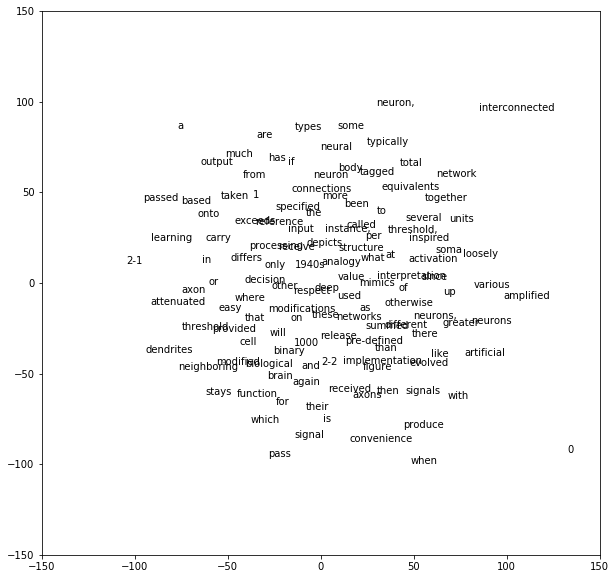

In [8]:
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
%matplotlib inline
W_embedded = TSNE(n_components=2).fit_transform(W_embed_trained)
plt.figure(figsize=(10,10))
for i in xrange(len(W_embedded)):
    plt.text(W_embedded[i,0],W_embedded[i,1],ind2word[i])

plt.xlim(-150,150)
plt.ylim(-150,150)
print "TSNE plot of the Word Vector Embeddings"


# Listing 4-1b. Skip-Gram Implementation in TensorFlow 

In [10]:
import numpy as np
import tensorflow as tf
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
%matplotlib inline 

#------------------------------------------------------------
# Function to one hot encode the words
#------------------------------------------------------------ 
def one_hot(ind,vocab_size):
    rec = np.zeros(vocab_size)
    rec[ind] = 1
    return rec

#----------------------------------------------------------------------
# Function to create the training data from the corpus
#---------------------------------------------------------------------- 
def create_training_data(corpus_raw,WINDOW_SIZE = 2):
    words_list = []

    for sent in corpus_raw.split('.'):
        for w in sent.split():
            if w != '.':  
                words_list.append(w.split('.')[0])       # Remove if delimiter is tied to the end of a word

    words_list = set(words_list)                     # Remove the duplicates for each word 

    word2ind = {}                                    # Define the dictionary for converting a word to index
    ind2word = {}                                    # Define dictionary for retrieving a word from its index

    vocab_size = len(words_list)                      # Count of unique words in the vocabulary

    for i,w in enumerate(words_list):                 # Build the dictionaries  
        word2ind[w] = i
        ind2word[i] = w
        
    print word2ind
    sentences_list = corpus_raw.split('.')
    sentences = []

    for sent in sentences_list:
        sent_array = sent.split()
        sent_array = [s.split('.')[0] for s in sent_array]
        sentences.append(sent_array)               # finally sentences would hold arrays of word array for sentences
    
    data_recs = []                                   # Holder for the input output record

    

    for sent in sentences:
        for ind,w in enumerate(sent):
            for nb_w in sent[max(ind - WINDOW_SIZE, 0) : min(ind + WINDOW_SIZE, len(sent)) + 1] : 
                if nb_w != w:
                    data_recs.append([w,nb_w])
    
    x_train,y_train = [],[]

    for rec in data_recs:
        x_train.append(one_hot(word2ind[ rec[0] ], vocab_size))
        y_train.append(one_hot(word2ind[ rec[1] ], vocab_size))
        
    return x_train,y_train,word2ind,ind2word,vocab_size

#------------------------------------------------------------------------------------------------
# Define the corpus and build the training data
corpus_raw = "Deep Learning has evolved from Artificial Neural Networks which has been there since the 1940s. Neural Networks are interconnected networks of processing units called artificial neurons, that loosely mimics axons in a biological brain. In a biological neuron, the Dendrites receive input signals from various neighboring neurons, typically greater than 1000. These modified signals are then passed on to the cell body or soma of the neuron where these signals are summed together and then passed on to the Axon of the neuron. If the received input signal is more than a specified threshold, the axon will release a signal which again will pass on to neighboring dendrites of other neurons. Figure 2-1 depicts the structure of a biological neuron for reference.The artificial neuron units are inspired from the biological neurons with some modifications as per convenience. Much like the dendrites the input connections to the neuron carry the attenuated or amplified input signals from other neighboring neurons. The signals are passed onto the neuron where the input signals are summed up and then a decision is taken what to output based on the total input received. For instance, for a binary threshold neuron output value of 1 is provided when the total input exceeds a pre-defined threshold, otherwise the output stays at 0. Several other types of neurons are used in artificial neural network and their implementation only differs with respect to the activation function on the total input to produce the neuron output. In Figure 2-2 the different biological equivalents are tagged in the artificial neuron for easy analogy and interpretation."
x_train,y_train,word2ind,ind2word,vocab_size= create_training_data(corpus_raw,2)

#---------------------------------------------
# Placeholders for Input output
#----------------------------------------------
x = tf.placeholder(tf.float32,[None,vocab_size])
y = tf.placeholder(tf.float32,[None,vocab_size])
#---------------------------------------------
# Define the Embedding matrix weights and a bias
#----------------------------------------------
W = tf.Variable(tf.random_normal([vocab_size,emb_dims],mean=0.0,stddev=0.02,dtype=tf.float32))
b = tf.Variable(tf.random_normal([emb_dims],mean=0.0,stddev=0.02,dtype=tf.float32))
W_outer = tf.Variable(tf.random_normal([emb_dims,vocab_size],mean=0.0,stddev=0.02,dtype=tf.float32))
b_outer = tf.Variable(tf.random_normal([vocab_size],mean=0.0,stddev=0.02,dtype=tf.float32))

hidden = tf.add(tf.matmul(x,W),b)
logits = tf.add(tf.matmul(hidden,W_outer),b_outer)
cost = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits=logits, labels=y))
optimizer = tf.train.AdamOptimizer(learning_rate=learning_rate).minimize(cost)

epochs,batch_size = 100,10
batch = len(x_train)//batch_size

# train for n_iter iterations
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    print 'was here'
    for epoch in xrange(epochs):
        batch_index = 0 
        for batch_num in xrange(batch):
            x_batch = x_train[batch_index: batch_index +batch_size]
            y_batch = y_train[batch_index: batch_index +batch_size]
            sess.run(optimizer,feed_dict={x: x_batch,y: y_batch})
            print('epoch:',epoch,'loss :', sess.run(cost,feed_dict={x: x_batch,y: y_batch}))
    W_embed_trained = sess.run(W)




{'tagged': 0, 'interpretation': 1, 'brain': 2, 'per': 3, 'summed': 4, 'threshold': 5, 'amplified': 6, 'networks': 7, 'based': 8, 'implementation': 9, 'signals': 10, '0': 74, 'only': 12, 'easy': 13, 'equivalents': 14, 'input': 15, 'has': 16, 'neuron': 100, 'then': 18, 'greater': 19, 'axons': 20, 'Dendrites': 21, 'threshold,': 22, 'stays': 23, 'depicts': 24, 'modifications': 25, 'like': 26, 'signal': 27, 'loosely': 28, 'Axon': 29, 'convenience': 30, 'Learning': 31, 'release': 32, 'output': 57, 'where': 34, 'Networks': 35, 'reference': 36, 'attenuated': 37, 'soma': 38, 'some': 39, 'modified': 90, 'connections': 41, 'differs': 42, 'Much': 43, 'are': 44, 'pass': 17, 'provided': 46, 'what': 47, 'network': 48, 'for': 49, 'decision': 50, 'since': 51, 'artificial': 52, 'cell': 53, 'various': 54, 'body': 55, 'processing': 56, 'biological': 33, 'received': 58, 'receive': 59, 'of': 60, 'inspired': 61, 'interconnected': 95, 'exceeds': 63, 'onto': 64, 'or': 65, '1000': 66, 'Artificial': 67, 'axon': 

(-150, 150)

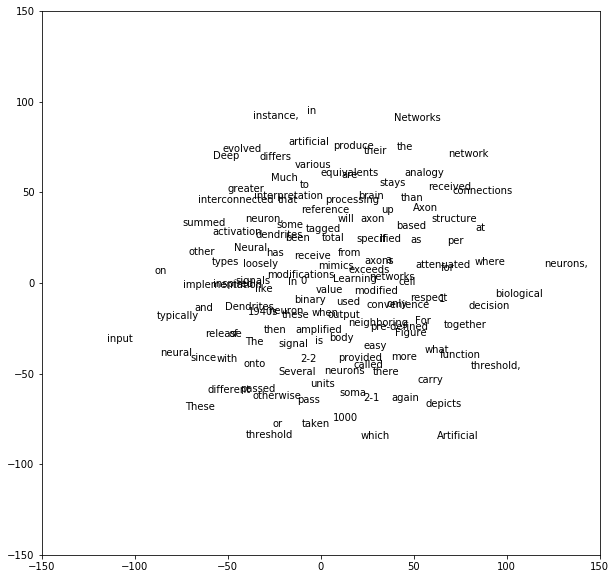

In [11]:
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
%matplotlib inline
W_embedded = TSNE(n_components=2).fit_transform(W_embed_trained)
plt.figure(figsize=(10,10))
for i in xrange(len(W_embedded)):
    plt.text(W_embedded[i,0],W_embedded[i,1],ind2word[i])

plt.xlim(-150,150)
plt.ylim(-150,150)


# Listing 4-1c Global Co-occurrence Statistics based Word Vector 

['I', 'like', 'Machine', 'Learning.']
['I', 'like', 'TensorFlow.']
['I', 'prefer', 'Python.']
co_occurence_matrix follows:
[[ 0.  2.  0.  0.  1.  0.  0.  1.]
 [ 2.  0.  1.  0.  0.  0.  0.  0.]
 [ 0.  1.  0.  0.  0.  1.  0.  0.]
 [ 0.  0.  0.  0.  0.  1.  1.  1.]
 [ 1.  0.  0.  0.  0.  0.  1.  0.]
 [ 0.  0.  1.  1.  0.  0.  0.  0.]
 [ 0.  0.  0.  1.  1.  0.  0.  0.]
 [ 1.  0.  0.  1.  0.  0.  0.  0.]]


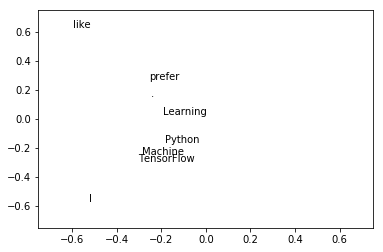

In [14]:
import numpy as np
import matplotlib.pyplot as plt


corpus = ['I like Machine Learning.','I like TensorFlow.','I prefer Python.']
corpus_words_unique = set()
corpus_processed_docs = []

# Process the documents in the corpus to create the Co-occrence count
for doc in corpus:
    corpus_words_ = []
    corpus_words = doc.split()
    print corpus_words
    for x in corpus_words:
        if len(x.split('.')) == 2:
            corpus_words_ += [x.split('.')[0]] + ['.']
        else:
            corpus_words_ += x.split('.')

    corpus_processed_docs.append(corpus_words_)
    corpus_words_unique.update(corpus_words_)
corpus_words_unique = np.array(list(corpus_words_unique))
co_occurence_matrix = np.zeros((len(corpus_words_unique),len(corpus_words_unique)))

for corpus_words_ in corpus_processed_docs:
    for i in xrange(1,len(corpus_words_)) :
        index_1 = np.argwhere(corpus_words_unique == corpus_words_[i])
        index_2 = np.argwhere(corpus_words_unique == corpus_words_[i-1])

        co_occurence_matrix[index_1,index_2] += 1
        co_occurence_matrix[index_2,index_1] += 1

U,S,V = np.linalg.svd(co_occurence_matrix,full_matrices=False)
print 'co_occurence_matrix follows:'
print co_occurence_matrix

for i in xrange(len(corpus_words_unique)):
    plt.text(U[i,0],U[i,1],corpus_words_unique[i])

plt.xlim((-0.75,0.75))
plt.ylim((-0.75,0.75))
plt.show() 

# Word Analogy with Word Vectors 

# Listing 4-2a. Load the glove vector Embeddings 

In [16]:
import numpy as np
import scipy
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
%matplotlib inline

########################
# Loading glove vector
########################

EMBEDDING_FILE = '/home/santanu/Downloads/glove.6B.300d.txt'
print('Indexing word vectors')
embeddings_index = {}
f = open(EMBEDDING_FILE)

count = 0

for line in f:
    if count == 0:
        count = 1
        continue
    values = line.split()
    word = values[0]

    coefs = np.asarray(values[1:], dtype='float32')
    embeddings_index[word] = coefs
f.close()

print('Found %d word vectors of glove.' % len(embeddings_index)) 

Indexing word vectors
Found 399999 word vectors of glove.


# Listing 4-2b. King Queen Analogy

In [17]:
# queen - woman +man ~ king 
king_wordvec = embeddings_index['king']
queen_wordvec = embeddings_index['queen']
man_wordvec = embeddings_index['man']
woman_wordvec = embeddings_index['woman']
pseudo_king = queen_wordvec - woman_wordvec + man_wordvec
cosine_simi = np.dot(pseudo_king/np.linalg.norm(pseudo_king),king_wordvec/np.linalg.norm(king_wordvec))
print 'Cosine Similarity',cosine_simi 

Cosine Similarity 0.663537


# Listing 4-2c. TSNE plot for king, queen, man and woman

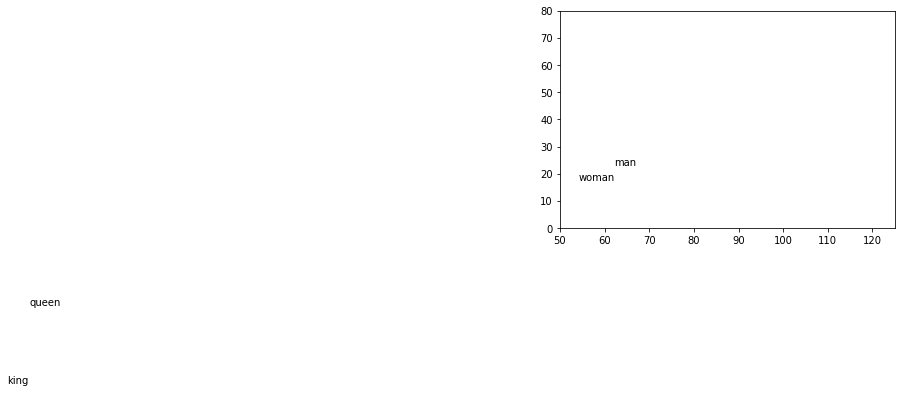

In [51]:
tsne = TSNE(n_components=2)
words_array = []
word_list = ['king','queen','man','woman']

for w in word_list:
    words_array.append(embeddings_index[w])

index1 = embeddings_index.keys()[0:100]

for i in xrange(100):
    words_array.append(embeddings_index[index1[i]])
words_array = np.array(words_array)
words_tsne = tsne.fit_transform(words_array)

ax = plt.subplot(111)

for i in xrange(4):
    plt.text(words_tsne[i, 0], words_tsne[i, 1],word_list[i])

plt.xlim((50,125))
plt.ylim((0,80)) 
plt.show() 
    

# Listing 4-3. TensorFlow Implementation of Reccurent Neural Network using LSTM for Classification 

In [1]:
##################################
#Import the Required Libraries
##################################

import tensorflow as tf
from tensorflow.contrib import rnn
import numpy as np

# Import MINST data
from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets("MNIST_data/", one_hot=True)

# Parameters
learning_rate = 0.001
training_iters = 100000
batch_size = 128
display_step = 50

# Network Parameters
n_input = 28 # MNIST data input (img shape: 28*28)
n_steps = 28 # timesteps
n_hidden = 128 # hidden layer num of features
n_classes = 10 # MNIST total classes (0-9 digits)
epochs = 2
num_train = mnist.train.num_examples 
num_batches = (num_train//batch_size) + 1


def RNN(x, weights, biases):

    # Prepare data shape to match LSTM  
    # Unstack to get a list of 'n_steps' tensors of shape (batch_size, n_input)
    x = tf.unstack(x, n_steps, 1)

    # Define a lstm cell with tensorflow
    lstm_cell = rnn.BasicLSTMCell(n_hidden, forget_bias=1.0)

    # Get lstm cell output
    outputs, states = rnn.static_rnn(lstm_cell, x, dtype=tf.float32)

    # Linear activation, using rnn inner loop last output
    return tf.matmul(outputs[-1], weights['out']) + biases['out']

# tf Graph input
x = tf.placeholder("float", [None, n_steps, n_input])
y = tf.placeholder("float", [None, n_classes])

# Define weights
weights = {
    'out': tf.Variable(tf.random_normal([n_hidden, n_classes]))
}
biases = {
    'out': tf.Variable(tf.random_normal([n_classes]))
}


pred = RNN(x, weights, biases)

# Define loss and optimizer
cost = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits=pred, labels=y))
optimizer = tf.train.AdamOptimizer(learning_rate=learning_rate).minimize(cost)

# Evaluate model
correct_pred = tf.equal(tf.argmax(pred,1), tf.argmax(y,1))
accuracy = tf.reduce_mean(tf.cast(correct_pred, tf.float32))

# Initializing the variables
init = tf.global_variables_initializer()



with tf.Session() as sess:
    sess.run(init)
    i = 0
    
    while i < epochs:
        for step in xrange(num_batches):
            batch_x, batch_y = mnist.train.next_batch(batch_size)
            batch_x = batch_x.reshape((batch_size, n_steps, n_input))
        # Run optimization op (backprop)
            sess.run(optimizer, feed_dict={x: batch_x, y: batch_y})
            if (step + 1) % display_step == 0:
                # Calculate batch accuracy
                acc = sess.run(accuracy, feed_dict={x: batch_x, y: batch_y})
                # Calculate batch loss
                loss = sess.run(cost, feed_dict={x: batch_x, y: batch_y})
                print "Epoch: " + str(i+1) + ",step:"+ str(step+1) +", Minibatch Loss= " + \
                      "{:.6f}".format(loss) + ", Training Accuracy= " + \
                      "{:.5f}".format(acc)
        i += 1
    print "Optimization Finished!"

    # Calculate accuracy for 128 mnist test images
    test_len = 1024
    test_data = mnist.test.images[:test_len].reshape((-1, n_steps, n_input))
    test_label = mnist.test.labels[:test_len]
    print "Testing Accuracy:", \
        sess.run(accuracy, feed_dict={x: test_data, y: test_label})

Extracting MNIST_data/train-images-idx3-ubyte.gz
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz
Epoch: 1,step:50, Minibatch Loss= 0.874432, Training Accuracy= 0.67188
Epoch: 1,step:100, Minibatch Loss= 0.837254, Training Accuracy= 0.77344
Epoch: 1,step:150, Minibatch Loss= 0.261696, Training Accuracy= 0.94531
Epoch: 1,step:200, Minibatch Loss= 0.406846, Training Accuracy= 0.88281
Epoch: 1,step:250, Minibatch Loss= 0.227278, Training Accuracy= 0.93750
Epoch: 1,step:300, Minibatch Loss= 0.159254, Training Accuracy= 0.92969
Epoch: 1,step:350, Minibatch Loss= 0.260627, Training Accuracy= 0.91406
Epoch: 1,step:400, Minibatch Loss= 0.130052, Training Accuracy= 0.94531
Epoch: 2,step:50, Minibatch Loss= 0.252877, Training Accuracy= 0.92188
Epoch: 2,step:100, Minibatch Loss= 0.096116, Training Accuracy= 0.97656
Epoch: 2,step:150, Minibatch Loss= 0.099564, Training Accuracy= 0.97656
Epoch: 2,step:20

# Listing 4-4. Next word Prediction and sentence completion in TensorFlow using Recurrent Neural Network 

In [3]:
import numpy as np
import tensorflow as tf
from tensorflow.contrib import rnn
import random
import collections
import time
# Parameters
learning_rate = 0.001
training_iters = 50000
display_step = 500
n_input = 3

# number of units in RNN cell
n_hidden = 512

tf.reset_default_graph()

def read_data(fname):
    with open(fname) as f:
        data = f.readlines()
    data = [x.strip() for x in data]
    data = [data[i].lower().split() for i in range(len(data))]
    data = np.array(data)
    data = np.reshape(data, [-1, ])
    return data

train_file = 'alice in wonderland.txt'
train_data = read_data(train_file)


def build_dataset(train_data):
    count = collections.Counter(train_data).most_common()
    dictionary = dict()
    for word, _ in count:
        dictionary[word] = len(dictionary)
    reverse_dictionary = dict(zip(dictionary.values(), dictionary.keys()))
    return dictionary, reverse_dictionary

dictionary, reverse_dictionary = build_dataset(train_data)
vocab_size = len(dictionary)


# Place holder for Mini batch input output
x = tf.placeholder("float", [None, n_input, 174])
y = tf.placeholder("float", [None, vocab_size])

# RNN output node weights and biases
weights = {
    'out': tf.Variable(tf.random_normal([n_hidden, vocab_size]))
}
biases = {
    'out': tf.Variable(tf.random_normal([vocab_size]))
}

def input_one_hot(num):
    x = np.zeros(vocab_size)
    x[num] = 1 
    return x.tolist()

def RNN(x, weights, biases):
    x = tf.unstack(x, n_input, 1)
    print np.shape(x)
    ## 2 layered LSTM 
    rnn_cell = rnn.MultiRNNCell([rnn.BasicLSTMCell(n_hidden),rnn.BasicLSTMCell(n_hidden)])

    # generate prediction
    outputs, states = rnn.static_rnn(rnn_cell, x, dtype=tf.float32)

    # there are n_input outputs but we only require the last output
    return tf.matmul(outputs[-1], weights['out']) + biases['out']

pred = RNN(x, weights, biases)

# Loss and optimizer
cost = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits=pred, labels=y))
optimizer = tf.train.RMSPropOptimizer(learning_rate=learning_rate).minimize(cost)

# Model evaluation
correct_pred = tf.equal(tf.argmax(pred,1), tf.argmax(y,1))
accuracy = tf.reduce_mean(tf.cast(correct_pred, tf.float32))

# Initializing the variables
init = tf.global_variables_initializer()

# Launch the graph
with tf.Session() as session:
    session.run(init)
    step = 0
    offset = random.randint(0,n_input+1)
    end_offset = n_input + 1
    acc_total = 0
    loss_total = 0

    
    while step < training_iters:
        if offset > (len(train_data)-end_offset):
            offset = random.randint(0, n_input+1)

        symbols_in_keys = [ input_one_hot(dictionary[ str(train_data[i])]) for i in range(offset, offset+n_input) ]
        symbols_in_keys = np.reshape(np.array(symbols_in_keys), [-1, n_input,vocab_size])
        symbols_out_onehot = np.zeros([vocab_size], dtype=float)
        symbols_out_onehot[dictionary[str(train_data[offset+n_input])]] = 1.0
        symbols_out_onehot = np.reshape(symbols_out_onehot,[1,-1])

        _, acc, loss, onehot_pred = session.run([optimizer, accuracy, cost, pred], \
                                                feed_dict={x: symbols_in_keys, y: symbols_out_onehot})
        loss_total += loss
        acc_total += acc
        
        if (step+1) % display_step == 0:
            print("Iter= " + str(step+1) + ", Average Loss= " + \
                  "{:.6f}".format(loss_total/display_step) + ", Average Accuracy= " + \
                  "{:.2f}%".format(100*acc_total/display_step))
            acc_total = 0
            loss_total = 0
            symbols_in = [train_data[i] for i in range(offset, offset + n_input)]
            symbols_out = train_data[offset + n_input]
            symbols_out_pred = reverse_dictionary[int(tf.argmax(onehot_pred, 1).eval())]
            print("%s - Actual word:[%s] vs Predicted word:[%s]" % (symbols_in,symbols_out,symbols_out_pred))
        step += 1
        offset += (n_input+1)
    print("Optimization Finished!")
   
    sentence = 'i only wish'
    words = sentence.split(' ')
    try:
        symbols_in_keys = [ input_one_hot(dictionary[ str(train_data[i])]) for i in range(offset, offset+n_input) ]
        for i in range(28):
            keys = np.reshape(np.array(symbols_in_keys), [-1, n_input,vocab_size])
            onehot_pred = session.run(pred, feed_dict={x: keys})
            onehot_pred_index = int(tf.argmax(onehot_pred, 1).eval())
            sentence = "%s %s" % (sentence,reverse_dictionary[onehot_pred_index])
            symbols_in_keys = symbols_in_keys[1:]
            symbols_in_keys.append(input_one_hot(onehot_pred_index))
        print(sentence)
    except:
        print("Word not in dictionary")

(3,)
Iter= 500, Average Loss= 4.242353, Average Accuracy= 16.60%
['so', 'stingy', 'about'] - Actual word:[it] vs Predicted word:[it]
Iter= 1000, Average Loss= 3.598423, Average Accuracy= 29.20%
['.', 'however,', 'she'] - Actual word:[did] vs Predicted word:[she]
Iter= 1500, Average Loss= 2.073462, Average Accuracy= 46.20%
['barley-sugar', 'and', 'such'] - Actual word:[things] vs Predicted word:[things]
Iter= 2000, Average Loss= 0.798790, Average Accuracy= 77.80%
[',', 'because', 'she'] - Actual word:[was] vs Predicted word:[was]
Iter= 2500, Average Loss= 0.338358, Average Accuracy= 91.60%
[',', "'", 'and'] - Actual word:[vinegar] vs Predicted word:[won't]
Iter= 3000, Average Loss= 0.366451, Average Accuracy= 90.40%
['so', 'close', 'to'] - Actual word:[her] vs Predicted word:[her]
Iter= 3500, Average Loss= 1.110132, Average Accuracy= 74.20%
['hot-tempered', ',', "'"] - Actual word:[she] vs Predicted word:[she]
Iter= 4000, Average Loss= 0.522139, Average Accuracy= 88.00%
['squeezed', 'he

# Listing 4-5 . Text used as Corpus in Listing 4-4 

' You can't think how glad I am to see you again , you dear old thing ! ' said the Duchess , as she tucked her arm affectionately into Alice's , and they walked off together . Alice was very glad to find her in such a pleasant temper , and thought to herself that perhaps it was only the pepper that had made her so savage when they met in the kitchen . ' When I'm a Duchess , ' she said to herself , ( not in a very hopeful tone though ) , ' I won't have any pepper in my kitchen at all . Soup does very well without — Maybe it's always pepper that makes people hot-tempered , ' she went on , very much pleased at having found out a new kind of rule , ' and vinegar that makes them sour — and camomile that makes them bitter — and — and barley-sugar and such things that make children sweet-tempered . I only wish people knew that : then they wouldn't be so stingy about it , you know — 'She had quite forgotten the Duchess by this time , and was a little startled when she heard her voice close to her

ear . ' You're thinking about something , my dear , and that makes you forget to talk . I can't tell you just now what the moral of that is , but I shall remember it in a bit . ' ' Perhaps it hasn't one , ' Alice ventured to remark . ' Tut , tut , child ! ' said the Duchess . ' Everything's got a moral , if only you can find it . ' And she squeezed herself up closer to Alice's side as she spoke . Alice did not much like keeping so close to her : first , because the Duchess was very ugly ; and secondly , because she was exactly the right height to rest her chin upon Alice's shoulder , and it was an uncomfortably sharp chin . However, she did not like to be rude , so she bore it as well as she could . 